<h1 style="text-align: center; color: purple;" markdown="1">Econ 320 Lab Assignment 5 </h1>
<h2 style="text-align: center; color: purple;" markdown="1">Name: Jerry Hong </h2>

In [16]:
# import necessary packages
import wooldridge as woo
import numpy as np 
import pandas as pd
import matplotlib as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api  as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms # BP test
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

# 1. Labor markets and returns to schooling
For this problem you will use the dataset supplied via Canvas, filename: “card.dta”, which is taken from Card, David (1995) “Using Geographic Variation in College Proximity to Estimate the Returns to Schooling," in Aspects of Labour Market Behavior: Essays in Honour of John Vanderkamp, ed. L. H. Christophides, E. K. Grand, and R. Swidinsky. Toronto: University of Toronto Press: 201-222. The data measure a variety of characteristics of individuals and include data on the proximity of two- and four-year colleges.

Familiarize yourself with the data based on the accompanying Pcard of Card’s working paper (look it up online, it is a old but good paper). Note where the data are originally from, what kind of sampling was involved, and the units of observation.

Pay particular attention to the following variables and ensure you know what they measure and in what units: wage, educ, exper, exper2. You may have to infer the units of measurement from the variable distributions. 

For your writeup, present a table that shows sample means, standard deviations, and minimum/maximum values for the wage, educ, exper variables (call this Table 1). In a note to this table, say how many observations are in the dataset and how many variables there are. Also present a scatter plot of wage by education in a way you think makes sense. Call this Figure 5.

Run the following regressions:

Specification 1: $ln⁡(wage)=\beta_0+\beta_1 (educ)+u_i$ 

Specification 2: $ln⁡(wage)=\beta_0+\beta_1 (educ)+\beta_2 (exper)+u_i$

Specification 3: $ln⁡(wage)=\beta_0+\beta_1 (educ)+\beta_2 (exper)+\beta_3 (expersq)+u_i$

Specification 4: $ln⁡(wage)=\beta_0+\beta_1 (educ)+ \beta_2 (exper)+ \beta_3 (expersq)+\beta_4 (married)+u_i$

Specification 5: $ln⁡(wage)=\beta_0+\beta_1 (educ)+ \beta_2 (exper)+ \beta_3 (expersq)+\beta_4 (married)+\beta_5(black)+u_i$ 

* For the married variable show two different ways of creating a dummy variable to incorporate in your regression. The new variables is such that 1 is married and 0 otherwise. Make your dummy based on the description in this [link](https://usa.ipums.org/usa-action/variables/MARST#codes_section)

* Present a regression output table (Table 2). Below the set of tables, provide discussion of the parameter estimates for Specification 5 (interpret the fitted values for $\beta_0$,$\beta_1$,$\beta_2$,$\beta_3$,$\beta_4$,$\beta_5$). Comment on any major changes you see between Specification 5 and Specification 2.

* When a worker gains one more year of experience, by how much is the wage expected to increase, on average? Discuss differences in the parameter estimates in specifications 2 and 3. (Hint: Take the derivative of each with respect to experience.)

* State the first two algebraic properties of the OLS estimator. Verify that these properties hold in Specification 1 and Specification 5. *(Hint: You will be able to do this by predicting the residuals into the data, and then using the “sum” function on the variables.)*




In [17]:
# import data set
card = pd.read_stata(r"C:\Users\jerry\OneDrive - Emory University\AtlantaJunior\Spring 2023\ECON 320\LAB\Data\card.dta")

In [18]:
# create table 
table = card[['wage', 'educ', 'exper', 'expersq']].describe().round(2)
print(table)
print(f'Number of observations: {card.shape[0]}')
print(f'Number of variables: {card.shape[1]}')

          wage     educ    exper  expersq
count  3010.00  3010.00  3010.00  3010.00
mean    577.28    13.26     8.86    95.58
std     262.96     2.68     4.14    84.62
min     100.00     1.00     0.00     0.00
25%     394.25    12.00     6.00    36.00
50%     537.50    13.00     8.00    64.00
75%     708.75    16.00    11.00   121.00
max    2404.00    18.00    23.00   529.00
Number of observations: 3010
Number of variables: 34


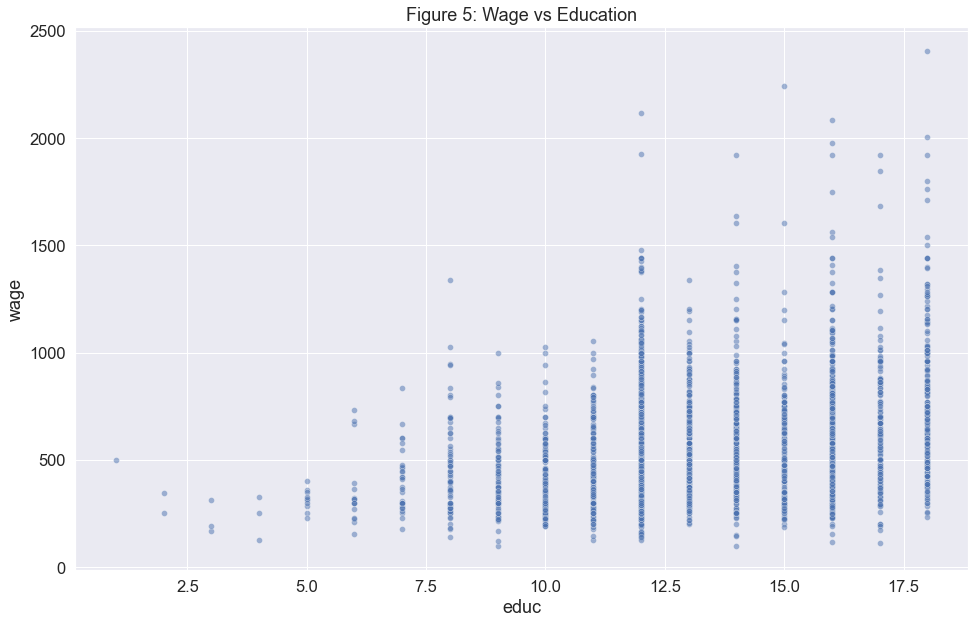

In [19]:
# create scatterplot
sns.set(rc = {'figure.figsize':(16,10)}, font_scale=1.5)
plot = sns.scatterplot(x ='educ', y='wage', data=card, alpha=0.5).set(title='Figure 5: Wage vs Education')

In [20]:
# running all the following regressions
m1 = smf.ols(formula='np.log(wage) ~ educ', data=card).fit()
m2 = smf.ols(formula='np.log(wage) ~ educ + exper', data=card).fit()
m3 = smf.ols(formula='np.log(wage) ~ educ + exper + expersq', data=card).fit()
m4 = smf.ols(formula='np.log(wage) ~ educ + exper + expersq + C(married)', data=card).fit()
m5 = smf.ols(formula='np.log(wage) ~ educ + exper + expersq + C(married) + black', data=card).fit()

In [21]:
# evaluating these regressions
star = Stargazer([m1, m2, m3, m4, m5])
star.covariate_order(['Intercept', 'educ', 'exper', 'expersq', 'C(married)[T.2.0]', 
                      'C(married)[T.3.0]', 'C(married)[T.4.0]', 'C(married)[T.5.0]', 'C(married)[T.6.0]', 'black'])
HTML(star.render_html())

## Commentary

From the above analysis, we see that in our fifth model, the hourly wage starts at $4.817 per hour, holding all factors equal. Each additional year of education increases the wage by 8 cents. An additional year of experience increases wage by 7.7 cents. One interesting observation is being married negatively affects wage from their coefficients. Finally, being black decreases wage by about 22 cents. 

The base wage in the second regression is lower, but the overall effects of education are greater. Also, experience seems to have a lesser effect compared to the first model. 

The derivative of specification 2 with respect to experience is $\beta_2$ while the derivative of specification 3 is $\beta_2 + 2 * \beta_3 (Experience)$

The effect of experience is greater in spec 3 compared to spec 2 (9 cents vs 4.1 cents). Given the derivative in spec 3 also has $2 * \beta_3 (Experience)$, experience has a greater effect.

The first two algebraic of OLS states that the summation of all residuals add up to zero and the summation of all the regressors multiplied by the estimated residuals is zero. 

In [22]:
# sum of residuals 
res1 = m1.resid
res5 = m5.resid
ressum1 = m1.resid.sum()
ressum5 = m5.resid.sum()

print(f'Sum of residuals (Spec 1): {ressum1}')
print(f'Sum of residuals (Spec 5): {ressum5}')

Sum of residuals (Spec 1): 1.6626700016786344e-12
Sum of residuals (Spec 5): 8.21472667666967e-10


Since the sums are so small, it is safe to say that the first property holds.

In [23]:
# check covariance between variables and the residuals

# spec 1
print(f'Specification 1:')
educ1 = np.cov(card['educ'], res1)[1,0]
print(f'Sum of product between education and residuals: {educ1}')

# spec 5
print(f'Specification 5:')
educ5 = (card['educ'] * res5).sum()
exper5 = (card['exper'] * res5).sum()
expersq5 = (card['expersq'] * res5).sum()
married5 = (card['married'] * res5).sum()
black5 = (card['black'] * res5).sum()

print(f'Sum of product between education and residuals: {educ5}')
print(f'Sum of product between experience and residuals: {exper5}')
print(f'Sum of product between experience squared and residuals: {expersq5}')
print(f'Sum of product between marriage and residuals: {married5}')
print(f'Sum of product between being black and residuals: {black5}')

Specification 1:
Sum of product between education and residuals: -2.3613916110338987e-17
Specification 5:
Sum of product between education and residuals: 9.727727956487797e-09
Sum of product between experience and residuals: 1.0072426448459737e-08
Sum of product between experience squared and residuals: 1.3765020412392914e-07
Sum of product between marriage and residuals: 1.599602228452568e-09
Sum of product between being black and residuals: 2.29761099035386e-10


Just like with the previous sums, these sums are very close to zero, so the second property holds.

## 2. Using the data wage2 from the wooldridge package. Estimate the models: m1, m2, m3, m4 

Model 1 $$log(wage) = \beta_0 + \beta_1 educ + \beta_2 exper + \beta_3tenure + \beta_4 married + u $$
Model 2  $$log(wage) = \beta_0 + \beta_1 educ + \beta_2 exper + \beta_3tenure + \beta_4 married + \beta_5 black + u $$
Model 3  $$log(wage) = \beta_0 + \beta_1 educ + \beta_2 exper + \beta_3tenure + \beta_4 married + \beta_5 black + \beta_6 south + u $$ 
Model 4  $$log(wage) = \beta_0 + \beta_1 educ + \beta_2 exper + \beta_3tenure + \beta_4 married + \beta_5 black + \beta_6 south + \beta_7 urban + u$$ 

 * Report the results using a stargazer table. Holding other factors fixed, what is the aproximate difference in monthly salary between blacks and non blacks, married vs single, urban vs rural?  Are these statistically significant? INTERPRET.
 

* Using model 4, add the variables $exper^2$ and $tenure^2$ to the equation show the regression results and test if they are jointly significant at 20% level. What about 25% Level? Explain.

* Using model 4 run model 6 by adding a dummy variable for age groups: less than or equal to 30, between 30 to 35, older than 35. 
  - Do a frequency table using `pd.crosstab` showing the distribution of each group.  
  - Make older than 35 the reference group, run a regression, what can you say about the effect of age group on the wages? 
  - Show the regression results in stargazer table. 
  
* Use model 4 but now allow wages to differ across four groups of people: married and black, married and nonblack, single and black, single and non black. Put the results in a stargarzer table. *(Hint: Think about how interactions work, what are all the categories in the interaction and what is the base category.) Do not create the interaction separately. Do it inside the `ols()` directly as learned in class. Interpret your result



<br>

>**Notice that**
 
$\beta_{married}+\beta_{black}+\beta_{married\&black} =$ *Effect of being married and black vs single and non-black.*

0.189+ -0.241+ 0.061 = 0.009 Same number for 𝛽𝑚𝑎𝑟𝑟𝑖𝑒𝑑&𝑏𝑙𝑎𝑐𝑘 

In [24]:
# import data
wage = woo.dataWoo('wage2')

In [25]:
# running each regression
t1 = smf.ols(formula='np.log(wage) ~ educ + exper + tenure + married', data=wage).fit()
t2 = smf.ols(formula='np.log(wage) ~ educ + exper + tenure + married + black', data=wage).fit()
t3 = smf.ols(formula='np.log(wage) ~ educ + exper + tenure + married + black + south', data=wage).fit()
t4 = smf.ols(formula='np.log(wage) ~ educ + exper + tenure + married + black + south + urban', data=wage).fit()


In [26]:
# evaluating the regressions
star1 = Stargazer([t1, t2, t3, t4])
HTML(star1.render_html())

## Reporting the findings

Holding all other factors fixed, the approximate difference in monthly salary between blacks and non-blacks is -0.197, -0.161, and -0.188 for each of the respective models. As all three have p-values less than 0.05, they are statistically significant. Interestingly, adding more regressors lessens the negative impact on wage, so perhaps being black has a negative effect on wage. 

The approximate difference in monthly salary between married and single is 0.199, 0.187, and 0.193, and 0.199 for each respective model. As all p-values are less than 0.05, they are statistically significant. 

The approximate difference in monthly salary between living in urban and rural areas is 0.184. With a p-value of 0.027, this is statistically significant, which is expected. 

In [27]:
# running model with exper^2 and tenure^2
t5 = smf.ols(formula='np.log(wage) ~ educ + exper + tenure + married + black + south + urban +' 'I(exper**2) + I(tenure**2)', data=wage).fit()
t5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     35.17
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.22e-53
Time:                        15:01:40   Log-Likelihood:                -380.05
No. Observations:                 935   AIC:                             780.1
Df Residuals:                     925   BIC:                             828.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.3587      0.126     42.558      0.000       5.112       5.606
educ               0.0643      0.006     10.184      0.000       0.052       0.077
exper              0.0172      0.013      1.365      0.173      -0.008       0.042
tenure             0.0249      0.008      3.066      0.002       0.009       0.041
married            0.1985      0.039      5.077      0.000       0.122       0.275
black             -0.1907      0.038     -5.057      0.000      -0.265      -0.117
south             -0.0912      0.026     -3.477      0.001      -0.143      -0.040
urban              0.1854      0.027      6.878      0.000       0.133       0.238
I(exper ** 2)     -0.0001      0.001     -0.214      0.831      -0.001       0.001
I(tenure ** 2)    -0.0008      0.000     -1.691      0.091      -0.002       0.000
==============================================================================
Omnibus:                       37.281   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.322
Skew:                          -0.199   Prob(JB):                     4.90e-19
Kurtosis:                       4.416   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# runnning the joint hypothesis
hypotheses = ['I(exper ** 2) = 0', 'I(tenure ** 2) = 0']

ftest = t5.f_test(hypotheses)
fstat = ftest.statistic
fpval = ftest.pvalue

print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

fstat: [[1.48980598]]

fpval: 0.22595675832794462



In [30]:
# creating frequency table dividing age groups
age = [0, 30, 35, 38]
wage['agegroup'] = pd.cut(wage['age'], bins = age, labels=['Younger than 30', '30-34', '35 and older'])

freq = pd.crosstab(wage['agegroup'], columns='count')
print(freq)

# running t6 regression
t6 = smf.ols(formula='np.log(wage) ~ educ + exper + tenure + married + black + south + urban +''I(C(agegroup, Treatment("35 and older")))', data=wage).fit()
t6.summary()

col_0            count
agegroup              
Younger than 30    251
30-34              408
35 and older       276


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     35.42
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           5.39e-54
Time:                        15:03:18   Log-Likelihood:                -379.20
No. Observations:                 935   AIC:                             778.4
Df Residuals:                     925   BIC:                             826.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        5.5328      0.130     42.577      0.000       5.278       5.788
I(C(agegroup, Treatment("35 and older")))[T.Younger than 30]    -0.0803      0.037     -2.157      0.031      -0.153      -0.007
I(C(agegroup, Treatment("35 and older")))[T.30-34]              -0.0389      0.030     -1.278      0.202      -0.099       0.021
educ                                                             0.0619      0.006      9.585      0.000       0.049       0.075
exper                                                            0.0105      0.004      2.914      0.004       0.003       0.018
tenure                                                           0.0110      0.002      4.423      0.000       0.006       0.016
married                                                          0.1951      0.039      4.994      0.000       0.118       0.272
black                                                           -0.1883      0.038     -5.006      0.000      -0.262      -0.114
south                                                           -0.0918      0.026     -3.500      0.000      -0.143      -0.040
urban                                                            0.1835      0.027      6.807      0.000       0.131       0.236
==============================================================================
Omnibus:                       38.035   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.703
Skew:                          -0.228   Prob(JB):                     1.81e-18
Kurtosis:                       4.374   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# running ANOVA test
anova = sm.stats.anova_lm(t6, typ=2)
print(anova)

                                               sum_sq     df          F  \
I(C(agegroup, Treatment("35 and older")))    0.619655    2.0   2.326242   
educ                                        12.237293    1.0  91.879866   
exper                                        1.130583    1.0   8.488627   
tenure                                       2.604983    1.0  19.558694   
married                                      3.321320    1.0  24.937089   
black                                        3.337191    1.0  25.056252   
south                                        1.631948    1.0  12.252966   
urban                                        6.172039    1.0  46.340813   
Residual                                   123.198870  925.0        NaN   

                                                 PR(>F)  
I(C(agegroup, Treatment("35 and older")))  9.823319e-02  
educ                                       8.213351e-21  
exper                                      3.659777e-03  
tenure           

In [34]:
t7 = smf.ols(formula = 'np.log(wage) ~ educ + exper + tenure + married*black + south + urban',
              data = wage).fit()

t8 = smf.ols(formula = 'np.log(wage) ~ educ + exper + tenure + married + black + south + urban +''married+black',
              data = wage).fit()

# recode so we can see combinations between marriage status and race
wage['marital_race'] = wage['married'].astype(int).astype('str') + '_' + wage['black'].astype(int).astype('str')

t9 = smf.ols(formula = 'np.log(wage) ~ educ + exper + tenure + marital_race + black + south + urban', 
             data = wage).fit()

star = Stargazer([t7, t8, t9])
star.covariate_order(['educ' , 'exper' , 'tenure', 'south', 'urban', 
                    'married' , 'black', 'married:black' , 'marital_race[T.1_0]',
                    'marital_race[T.0_1]','marital_race[T.1_1]','Intercept'])

HTML(star.render_html())

## Commentary

Among all three models, being black saw a negative effect, with the first model having the strongest effect with a decrease of 24.1%. Being married and black saw a positive effect with an increase of 6.1%. The part that was worth noting is the interaction between married and race. The difference between married and non-black and married and black is roughly 10%. In general, being married presents a strong positive effect on wage. However, adding someone who is black reduces the effect, suggesting the adverse effects of racial discrimination of reducing financial opportunities among the black population.